In [5]:
import numpy as np
import pandas as pd

import re
import json

import matplotlib.pyplot as plt
from pathlib import Path

# Set some parameters in the packages 

plt.rcParams['figure.figsize'] = (10,7)
pd.options.display.max_rows = 20  
pd.options.display.max_columns = 15

# Some packages to help with configuration

import os, sys, watermark

#home_path = os.environ.get("HOME","..") + "/shared/project-1"
data_path_recent = f'trump_tweets_recent.json' 
data_path_old_1 = f'old_trump_tweets_1.json'
data_path_old_2 = f'old_trump_tweets_2.json'
lexicon_path = f'vader.csv'

In [6]:
print("python", sys.version.split("|")[0], "\n")

assert 'pandas' in sys.modules and "pd" in locals()
print(watermark.watermark(packages = "pandas"))

assert 're' in sys.modules and 'json' in sys.modules
print(watermark.watermark(packages = "re"))

assert 'matplotlib' in sys.modules and "plt" in locals()
print(watermark.watermark(packages = "matplotlib"))

assert "home_path" in locals()

python 3.11.11  

pandas: 2.2.3

re: 2.2.1

matplotlib: 3.10.0



In [7]:
with open(data_path_recent) as file_handle: 
    trump_tweets_recent = json.load(file_handle)
    
trump_tweets_recent[0]

{'created_at': 'Fri Mar 06 05:21:26 +0000 2020',
 'id': 1235797615041753088,
 'id_str': '1235797615041753088',
 'full_text': 'Thanks Linda, but they were really good last night! https://t.co/feLtQTrzO5',
 'truncated': False,
 'display_text_range': [0, 51],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/feLtQTrzO5',
    'expanded_url': 'https://twitter.com/lindasuhler/status/1235720698527502338',
    'display_url': 'twitter.com/lindasuhler/st…',
    'indices': [52, 75]}]},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 25073877,
  'id_str': '25073877',
  'name': 'Donald J. Trump',
  'screen_name': 'realDonaldTrump',
  'location': 'Washington, DC',
  'description': '45th President of the United States of 

In [8]:
list(trump_tweets_recent[0].keys())

['created_at',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'quoted_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'lang']

In [9]:
trump_tweets_recent[0]["full_text"]

'Thanks Linda, but they were really good last night! https://t.co/feLtQTrzO5'

In [10]:
list_created_at = [tweet['created_at'] for tweet in trump_tweets_recent]
pandas_created_at = pd.to_datetime(list_created_at)
pandas_created_at

/tmp/ipykernel_2565/100582339.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pandas_created_at = pd.to_datetime(list_created_at)


DatetimeIndex(['2020-03-06 05:21:26+00:00', '2020-03-06 05:19:02+00:00',
               '2020-03-06 05:17:33+00:00', '2020-03-06 05:15:37+00:00',
               '2020-03-06 05:14:36+00:00', '2020-03-06 05:14:16+00:00',
               '2020-03-06 05:13:34+00:00', '2020-03-06 05:11:48+00:00',
               '2020-03-06 05:11:46+00:00', '2020-03-06 05:10:19+00:00',
               ...
               '2019-12-23 13:38:33+00:00', '2019-12-23 03:22:23+00:00',
               '2019-12-23 02:21:07+00:00', '2019-12-23 02:20:17+00:00',
               '2019-12-23 02:20:00+00:00', '2019-12-22 23:50:00+00:00',
               '2019-12-22 22:18:24+00:00', '2019-12-22 22:14:34+00:00',
               '2019-12-22 20:21:31+00:00', '2019-12-22 20:18:34+00:00'],
              dtype='datetime64[ns, UTC]', length=2196, freq=None)

In [11]:
oldest_month = pandas_created_at.sort_values()[0].month
oldest_month

12

In [12]:
oldest_year = pandas_created_at.sort_values()[0].year
oldest_year

2019

In [13]:
with open(data_path_old_1) as file_handle:
    old_trump_tweets_1 = json.load(file_handle)

with open(data_path_old_2) as file_handle:
    old_trump_tweets_2 = json.load(file_handle)

In [14]:
list_trump_tweets = old_trump_tweets_1 + old_trump_tweets_2
print(f"Total number of tweets: {len(list_trump_tweets)}")

Total number of tweets: 9952


In [15]:
for tweet in list_trump_tweets:
    if "full_text" in tweet.keys():
        tweet['text'] = tweet.pop("full_text")

In [16]:
columns = ['created_at', 'id', "text", 'source', 'retweet_count']

all_trump_tweets = pd.DataFrame(data = list_trump_tweets)
all_trump_tweets = all_trump_tweets[columns]
all_trump_tweets

,created_at,id,text,source,retweet_count
0,Wed Oct 12 14:00:48 +0000 2016,786204978629185536,PAY TO PLAY POLITICS. \n#CrookedHillary https:...,"<a href=""http://twitter.com/download/iphone"" r...",24915
1,Wed Oct 12 13:46:43 +0000 2016,786201435486781440,Very little pick-up by the dishonest media of ...,"<a href=""http://twitter.com/download/iphone"" r...",22609
2,Wed Oct 12 12:59:05 +0000 2016,786189446274248704,Crooked Hillary Clinton likes to talk about th...,"<a href=""http://twitter.com/download/android"" ...",18329
3,Wed Oct 12 04:04:47 +0000 2016,786054986534969344,Thank you Florida- a MOVEMENT that has never b...,"<a href=""http://twitter.com/download/iphone"" r...",18789
4,Wed Oct 12 00:56:06 +0000 2016,786007502639038464,Join me Thursday in Florida &amp; Ohio!\nWest ...,"<a href=""http://twitter.com/download/iphone"" r...",7761
...,...,...,...,...,...
9947,Fri Oct 20 02:53:42 +0000 2017,921207772233990144,The Fake News is going crazy with wacky Congre...,"<a href=""http://twitter.com/download/iphone"" r...",19277
9948,Fri Oct 20 01:43:00 +0000 2017,921189980843663360,Keep up the GREAT work. I am with you 100%!\n\...,"<a href=""https://studio.twitter.com"" rel=""nofo...",11882
9949,Thu Oct 19 20:40:21 +0000 2017,921113816053755904,It was great to have Governor @RicardoRossello...,"<a href=""http://twitter.com/download/iphone"" r...",10158
9950,Thu Oct 19 12:21:18 +0000 2017,920988223362469891,".@foxandfriends ""Russia sent millions to Clint...","<a href=""http://twitter.com/download/iphone"" r...",23219


In [17]:
all_trump_tweets[all_trump_tweets["id"] == 965582280772276224]

,created_at,id,text,source,retweet_count
5211,Mon Feb 19 13:42:10 +0000 2018,965582280772276224,"Have a great, but very reflective, President’s...","<a href=""http://twitter.com/download/iphone"" r...",19473
9087,Mon Feb 19 13:42:10 +0000 2018,965582280772276224,"Have a great, but very reflective, President’s...","<a href=""http://twitter.com/download/iphone"" r...",22399


In [18]:
def select_first_row(group):
    return group.iloc[0]

trump_tweets = all_trump_tweets.groupby(all_trump_tweets['id']).agg(select_first_row)
trump_tweets

,created_at,text,source,retweet_count
id,,,,
690171032150237184,Thu Jan 21 13:56:11 +0000 2016,"""@bigop1: @realDonaldTrump @SarahPalinUSA htt...","<a href=""http://twitter.com/download/android"" ...",1059
690171403388104704,Thu Jan 21 13:57:39 +0000 2016,"""@AmericanAsPie: @glennbeck @SarahPalinUSA Re...","<a href=""http://twitter.com/download/android"" ...",1339
690173226341691392,Thu Jan 21 14:04:54 +0000 2016,So sad that @CNN and many others refused to sh...,"<a href=""http://twitter.com/download/android"" ...",2006
690176882055114758,Thu Jan 21 14:19:26 +0000 2016,Sad sack @JebBush has just done another ad on ...,"<a href=""http://twitter.com/download/android"" ...",2266
690180284189310976,Thu Jan 21 14:32:57 +0000 2016,Low energy candidate @JebBush has wasted $80 m...,"<a href=""http://twitter.com/download/android"" ...",2886
...,...,...,...,...
1052213711295930368,Tue Oct 16 15:04:32 +0000 2018,“Federal Judge throws out Stormy Danials lawsu...,"<a href=""http://twitter.com/download/iphone"" r...",14594
1052217314463100928,Tue Oct 16 15:18:51 +0000 2018,“Conflict between Glen Simpson’s testimony to ...,"<a href=""http://twitter.com/download/iphone"" r...",6271
1052219253384994816,Tue Oct 16 15:26:33 +0000 2018,"Is it really possible that Bruce Ohr, whose wi...","<a href=""http://twitter.com/download/iphone"" r...",13103


In [19]:
duplicate_rows_removed = len(all_trump_tweets) - len(trump_tweets)
print(duplicate_rows_removed)

866


In [20]:
trump_tweets['source'].unique()

array(['<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M5)</a>',
       '<a href="http://instagram.com" rel="nofollow">Instagram</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
       '<a href="https://periscope.tv" rel="nofollow">Periscope</a>',
       '<a href="https://ads.twitter.com" rel="nofollow">Twitter Ads</a>'],
      dtype=object)

In [21]:
trump_tweets['source'] = trump_tweets['source'].str.extract(r"<.+>(.*)<.+>")
trump_tweets['source'].unique()

array(['Twitter for Android', 'Twitter for iPhone', 'Twitter Web Client',
       'Mobile Web (M5)', 'Instagram', 'Twitter for iPad', 'Media Studio',
       'Periscope', 'Twitter Ads'], dtype=object)

In [22]:
trump_tweets_devices = trump_tweets['source'].value_counts()
trump_tweets_devices

source
Twitter for iPhone     6487
Twitter for Android    1982
Twitter Web Client      365
Media Studio            155
Twitter for iPad         59
Twitter Ads              34
Instagram                 2
Mobile Web (M5)           1
Periscope                 1
Name: count, dtype: int64

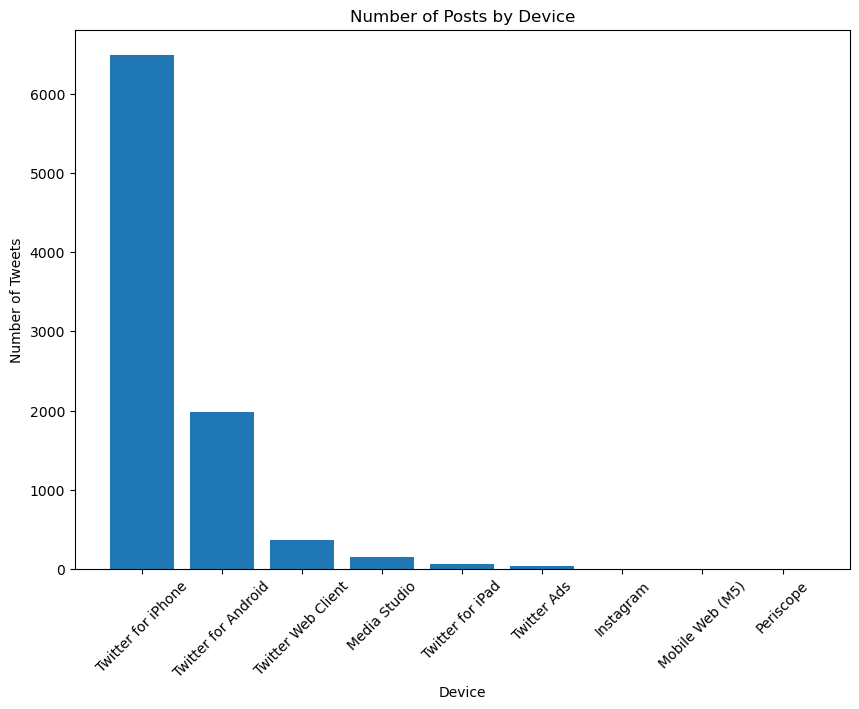

In [25]:
horizontal_data = trump_tweets_devices.index
vertical_data = trump_tweets_devices.values

plt.bar(horizontal_data, vertical_data)

plt.title("Number of Posts by Device")
plt.xlabel("Device")
plt.xticks(range(len(horizontal_data)), horizontal_data, rotation = 45)
plt.ylabel("Number of Tweets");

In [28]:
iphone_usage = 6487
android_usage = 1982
frequency_of_iPhone_usage_was_more_than_three_times_the_frequency_of_Android_usage = iphone_usage > 3 * android_usage
print(frequency_of_iPhone_usage_was_more_than_three_times_the_frequency_of_Android_usage)

True


In [29]:
trump_tweets['created_at'] = pd.to_datetime(trump_tweets['created_at'])
trump_tweets['est_time'] = trump_tweets['created_at'].dt.tz_convert("EST") 
trump_tweets['est_time']

/tmp/ipykernel_2565/3075890374.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trump_tweets['created_at'] = pd.to_datetime(trump_tweets['created_at'])


id
690171032150237184    2016-01-21 08:56:11-05:00
690171403388104704    2016-01-21 08:57:39-05:00
690173226341691392    2016-01-21 09:04:54-05:00
690176882055114758    2016-01-21 09:19:26-05:00
690180284189310976    2016-01-21 09:32:57-05:00
                                 ...           
1052213711295930368   2018-10-16 10:04:32-05:00
1052217314463100928   2018-10-16 10:18:51-05:00
1052219253384994816   2018-10-16 10:26:33-05:00
1052232230972678145   2018-10-16 11:18:08-05:00
1052233253040640001   2018-10-16 11:22:11-05:00
Name: est_time, Length: 9086, dtype: datetime64[ns, EST]

In [30]:
trump_tweets['hour'] = trump_tweets['est_time'].dt.hour 

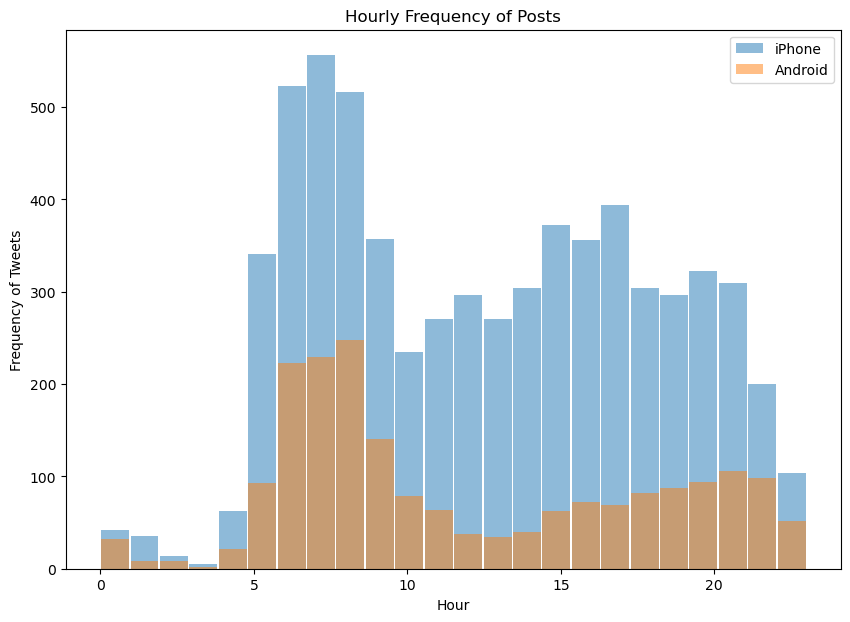

In [31]:
data_Android = trump_tweets[trump_tweets['source'] == "Twitter for Android"]["hour"]
data_iPhone = trump_tweets[trump_tweets['source'] == "Twitter for iPhone"]["hour"]

plt.hist(data_iPhone, bins = 24, rwidth = 0.95, alpha = 0.5, label = "iPhone")
plt.hist(data_Android, bins = 24, rwidth = 0.95, alpha = 0.5, label = "Android")

plt.title("Hourly Frequency of Posts")
plt.xlabel("Hour")
plt.ylabel("Frequency of Tweets")
plt.legend()
plt.show()

In [32]:
iphone_hourly = trump_tweets[trump_tweets['source'] == "Twitter for iPhone"]['hour'].value_counts().sort_index()
android_hourly = trump_tweets[trump_tweets['source'] == "Twitter for Android"]['hour'].value_counts().sort_index()


The_hourly_frequency_of_posts_by_iPhone_exceed_the_hourly_frequency_of_posts_by_Android = (iphone_hourly > android_hourly).all()

print(The_hourly_frequency_of_posts_by_iPhone_exceed_the_hourly_frequency_of_posts_by_Android) 

True


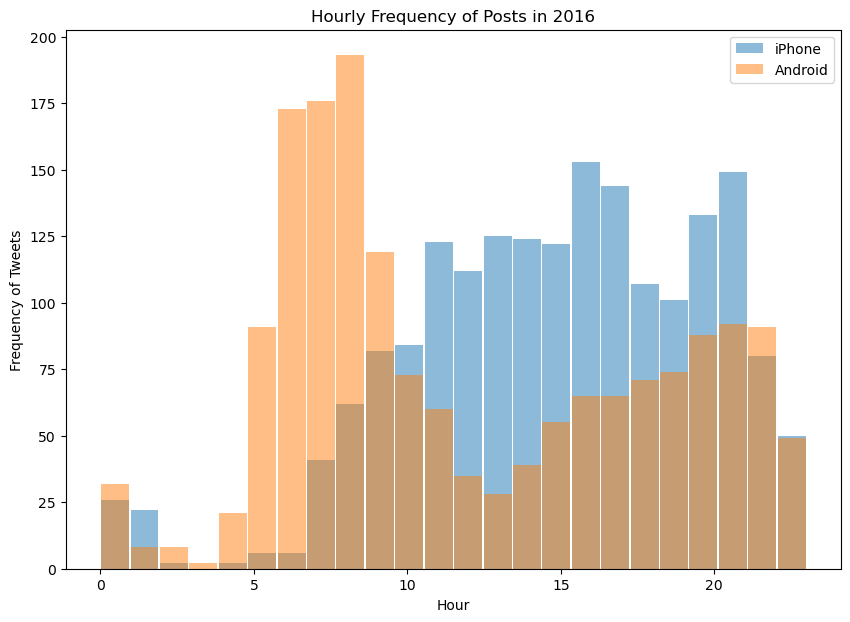

In [33]:
tweets_2016 = trump_tweets[trump_tweets['created_at'].dt.year == 2016]

# Extract 'hour' column for iPhone and Android sources
data_iPhone = tweets_2016[tweets_2016['source'] == "Twitter for iPhone"]['hour']
data_Android = tweets_2016[tweets_2016['source'] == "Twitter for Android"]['hour']


plt.hist(data_iPhone, bins = 24, rwidth = 0.95, alpha = 0.5, label = "iPhone")
plt.hist(data_Android, bins = 24, rwidth = 0.95, alpha = 0.5, label = "Android")

plt.title("Hourly Frequency of Posts in 2016")
plt.xlabel("Hour")
plt.ylabel("Frequency of Tweets")
plt.legend();

In [34]:
sentiment = pd.read_csv(lexicon_path)
sentiment

,token,polarity
0,$:,-1.5
1,%),-0.4
2,%-),-1.5
3,&-:,-0.4
4,&:,-0.7
...,...,...
7512,}:,-2.1
7513,}:(,-2.0
7514,}:),0.4
7515,}:-(,-2.1


In [35]:
trump_tweets['text'] = trump_tweets['text'].str.lower()

In [36]:
pattern = r'[^\w\s]'
trump_tweets['no_punctuation'] = trump_tweets['text'].str.replace(pattern, ' ')

In [37]:
wide_format = trump_tweets["no_punctuation"].str.split(expand = True)
wide_format = wide_format.reset_index()
wide_format

,id,0,1,2,3,4,5,...,53,54,55,56,57,58,59
0,690171032150237184,"""@bigop1:",@realdonaldtrump,@sarahpalinusa,"https://t.co/3kyqgqevyd""",None,None,...,None,None,None,None,None,None,None
1,690171403388104704,"""@americanaspie:",@glennbeck,@sarahpalinusa,remember,when,glenn,...,None,None,None,None,None,None,None
2,690173226341691392,so,sad,that,@cnn,and,many,...,None,None,None,None,None,None,None
3,690176882055114758,sad,sack,@jebbush,has,just,done,...,None,None,None,None,None,None,None
4,690180284189310976,low,energy,candidate,@jebbush,has,wasted,...,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9081,1052213711295930368,“federal,judge,throws,out,stormy,danials,...,None,None,None,None,None,None,None
9082,1052217314463100928,“conflict,between,glen,simpson’s,testimony,to,...,None,None,None,None,None,None,None
9083,1052219253384994816,is,it,really,possible,that,bruce,...,None,None,None,None,None,None,None
9084,1052232230972678145,rt,@whitehouse:,https://t.co/rnqlpots3o,None,None,None,...,None,None,None,None,None,None,None


In [38]:
numbered_columns = wide_format.columns[1:]

long_format = pd.melt(wide_format, id_vars=['id'], value_vars=numbered_columns, var_name="location", value_name="word")
long_format

,id,location,word
0,690171032150237184,0,"""@bigop1:"
1,690171403388104704,0,"""@americanaspie:"
2,690173226341691392,0,so
3,690176882055114758,0,sad
4,690180284189310976,0,low
...,...,...,...
545155,1052213711295930368,59,None
545156,1052217314463100928,59,None
545157,1052219253384994816,59,None
545158,1052232230972678145,59,None


In [40]:
left_table = long_format
right_table = sentiment
left_column = "word"
right_column = "token"

long_format_join_sentiment = pd.merge(left = left_table, 
                                      right = right_table,
                                      left_on = left_column, 
                                      right_on = right_column,
                                      how="left")
long_format_join_sentiment

,id,location,word,token,polarity
0,690171032150237184,0,"""@bigop1:",NaN,NaN
1,690171403388104704,0,"""@americanaspie:",NaN,NaN
2,690173226341691392,0,so,NaN,NaN
3,690176882055114758,0,sad,sad,-2.1
4,690180284189310976,0,low,low,-1.1
...,...,...,...,...,...
545161,1052213711295930368,59,None,NaN,NaN
545162,1052217314463100928,59,None,NaN,NaN
545163,1052219253384994816,59,None,NaN,NaN
545164,1052232230972678145,59,None,NaN,NaN


In [41]:
fill_value = 0

long_format_join_sentiment = long_format_join_sentiment.fillna(fill_value)
long_format_join_sentiment

/tmp/ipykernel_2565/3777005330.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  long_format_join_sentiment = long_format_join_sentiment.fillna(fill_value)


,id,location,word,token,polarity
0,690171032150237184,0,"""@bigop1:",0,0.0
1,690171403388104704,0,"""@americanaspie:",0,0.0
2,690173226341691392,0,so,0,0.0
3,690176882055114758,0,sad,sad,-2.1
4,690180284189310976,0,low,low,-1.1
...,...,...,...,...,...
545161,1052213711295930368,59,0,0,0.0
545162,1052217314463100928,59,0,0,0.0
545163,1052219253384994816,59,0,0,0.0
545164,1052232230972678145,59,0,0,0.0


In [42]:
trump_tweets['polarity'] = long_format_join_sentiment.groupby(long_format_join_sentiment["id"]).agg({"polarity": sum})

/tmp/ipykernel_2565/3868258243.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  trump_tweets['polarity'] = long_format_join_sentiment.groupby(long_format_join_sentiment["id"]).agg({"polarity": sum})


In [43]:
negative_tweets = trump_tweets.sort_values('polarity').head(3)

for tweet in negative_tweets["text"]:
    print('\n  ', tweet)


   it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u.s. postal system from china. we can, and must, end this now! the senate should pass the stop act – and firmly stop this poison from killing our children and destroying our country. no more delay!

   the rigged russian witch hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. all credibility is gone from this terrible hoax, and much more will be lost as it proceeds. no collusion!

   where’s the collusion? they made up a phony crime called collusion, and when there was no collusion they say there was obstruction (of a phony crime that never existed). if you fight back or say anything bad about the rigged witch hunt, they scream obstruction!


In [44]:
positive_tweets = trump_tweets.sort_values('polarity').tail(3)

for tweet in positive_tweets["text"]:
    print('\n  ', tweet)


   thank you for all of the compliments on getting the world cup to come to the u.s.a., mexico and canada. i worked hard on this, along with a great team of talented people. we never fail, and it will be a great world cup! a special thanks to bob kraft for excellent advice.

   congratulations to france, who played extraordinary soccer, on winning the 2018 world cup. additionally, congratulations to president putin and russia for putting on a truly great world cup tournament -- one of the best ever!

   congratulations to patrick reed on his great and courageous masters win! when patrick had his amazing win at doral 5 years ago, people saw his great talent, and a bright future ahead. now he is the masters champion!


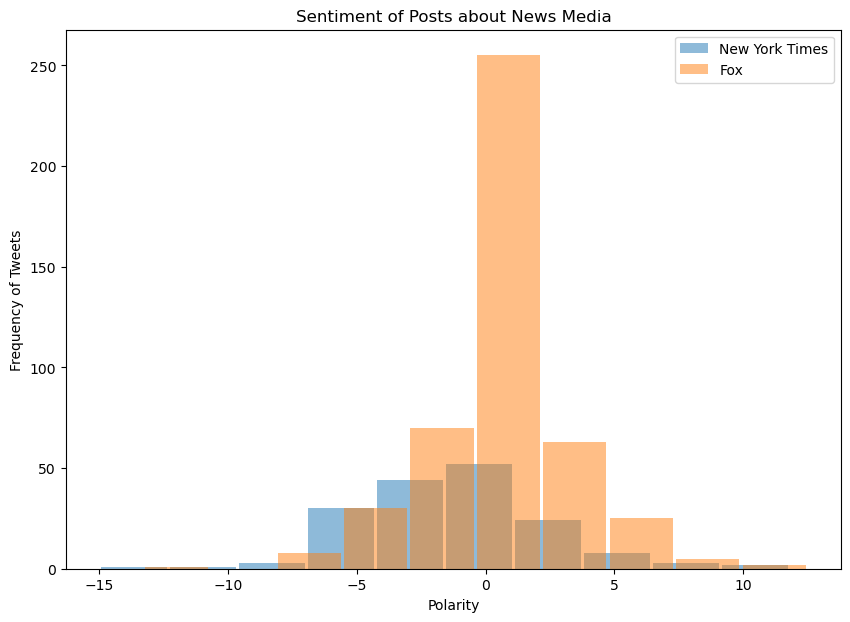

In [45]:
nyt_tweets = trump_tweets[trump_tweets["no_punctuation"].str.contains("nyt")]
fox_tweets = trump_tweets[trump_tweets["no_punctuation"].str.contains("fox")]

plt.hist(nyt_tweets["polarity"], rwidth = 0.95, alpha = 0.5, label = "New York Times")
plt.hist(fox_tweets["polarity"], rwidth = 0.95, alpha = 0.5, label = "Fox")

plt.title("Sentiment of Posts about News Media")
plt.xlabel("Polarity")
plt.ylabel("Frequency of Tweets")
plt.legend();

In [46]:
mean_polarity_nyt = nyt_tweets["polarity"].mean()
mean_polarity_fox = fox_tweets["polarity"].mean()

# if Fox's sentiment is more positive than NYT
Polarity = mean_polarity_fox > mean_polarity_nyt


print("Mean polarity of NYT:", mean_polarity_nyt)
print("Mean polarity of Fox:", mean_polarity_fox)
print("Is Fox more positive than NYT?", Polarity)

Mean polarity of NYT: -1.2988095238095236
Mean polarity of Fox: 0.4213507625272331
Is Fox more positive than NYT? True
